PART - A

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('DATA (1).csv')

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

(None,
   STUDENT ID  1  2  3  4  5  6  7  8  9  ...  23  24  25  26  27  28  29  30  \
 0   STUDENT1  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   1   2   1   1   
 1   STUDENT2  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   3   2   2   3   
 2   STUDENT3  2  2  2  3  2  2  2  2  4  ...   1   1   2   2   1   1   2   2   
 3   STUDENT4  1  1  1  3  1  2  1  2  1  ...   1   2   3   2   2   1   3   2   
 4   STUDENT5  2  2  1  3  2  2  1  3  1  ...   2   1   2   2   2   1   2   2   
 
    COURSE ID  GRADE  
 0          1      1  
 1          1      1  
 2          1      1  
 3          1      1  
 4          1      1  
 
 [5 rows x 33 columns])

In [4]:
# Drop the 'STUDENT ID' column as it is not useful for classification
df = df.drop(columns=["STUDENT ID"])

# Check unique values in the target variable 'GRADE'
df["GRADE"].value_counts()

GRADE
1    35
2    24
3    21
5    17
7    17
6    13
4    10
0     8
Name: count, dtype: int64

In [6]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

/var/folders/18/dpnmnwsj0nz74sltb7rw_9380000gn/T/ipykernel_38521/3922232567.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grade_corr.values, y=grade_corr.index, palette="viridis")


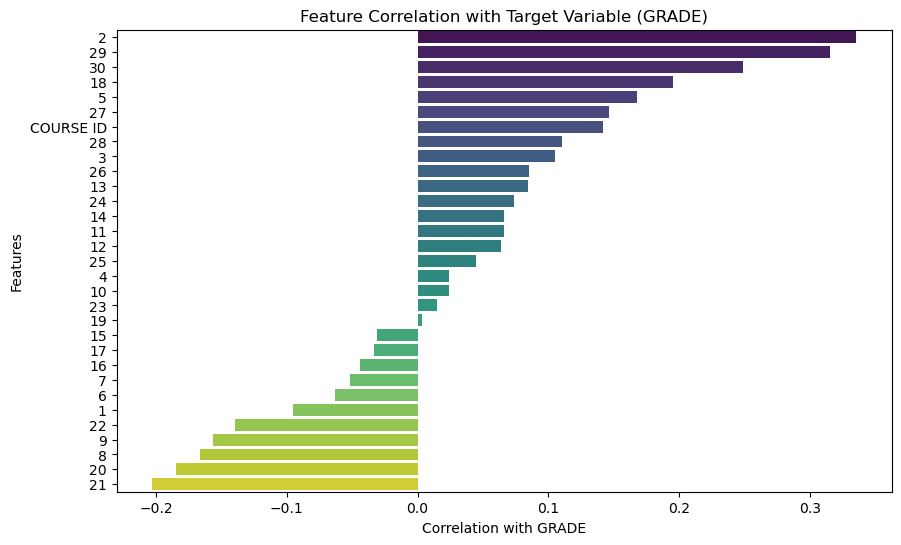

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Extract correlation of features with the target variable 'GRADE'
grade_corr = corr_matrix["GRADE"].drop("GRADE").sort_values(ascending=False)

# Plot the correlation of features with 'GRADE'
plt.figure(figsize=(10, 6))
sns.barplot(x=grade_corr.values, y=grade_corr.index, palette="viridis")
plt.xlabel("Correlation with GRADE")
plt.ylabel("Features")
plt.title("Feature Correlation with Target Variable (GRADE)")
plt.show()

PART - B

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the threshold for feature selection (choosing |0.2| for now)
selected_features = grade_corr[abs(grade_corr) > 0.2].index

# Extract relevant features and target variable
X = df[selected_features]
y = df["GRADE"]

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality (keep 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Number of principal components retained
X_pca.shape

(145, 4)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Bagging": BaggingClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate models on original dataset
original_scores = {}
pca_scores = {}

for name, model in models.items():
    # Train on original dataset
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    original_scores[name] = accuracy_score(y_test, y_pred)
    
    # Train on PCA-reduced dataset
    model.fit(X_pca_train, y_pca_train)
    y_pca_pred = model.predict(X_pca_test)
    pca_scores[name] = accuracy_score(y_pca_test, y_pca_pred)

original_scores, pca_scores

({'Logistic Regression': 0.13793103448275862,
  'Decision Tree': 0.20689655172413793,
  'Random Forest': 0.13793103448275862,
  'SVC': 0.20689655172413793,
  'Gradient Boosting': 0.20689655172413793,
  'Bagging': 0.20689655172413793,
  'Naive Bayes': 0.13793103448275862},
 {'Logistic Regression': 0.13793103448275862,
  'Decision Tree': 0.2413793103448276,
  'Random Forest': 0.20689655172413793,
  'SVC': 0.1724137931034483,
  'Gradient Boosting': 0.2413793103448276,
  'Bagging': 0.1724137931034483,
  'Naive Bayes': 0.1724137931034483})

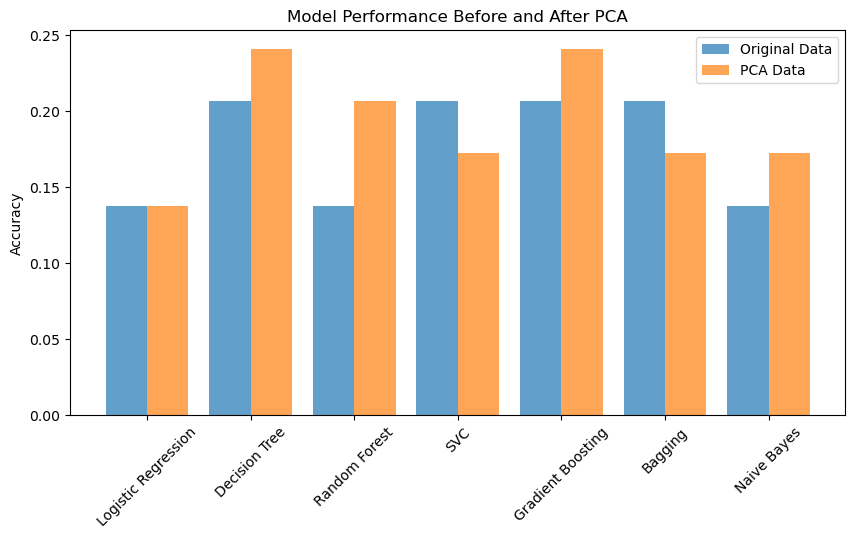

In [16]:
# Plot model comparison before and after PCA
plt.figure(figsize=(10, 5))
models_list = list(models.keys())

x = range(len(models_list))
plt.bar(x, original_scores.values(), width=0.4, label="Original Data", alpha=0.7)
plt.bar([i + 0.4 for i in x], pca_scores.values(), width=0.4, label="PCA Data", alpha=0.7)

plt.xticks([i + 0.2 for i in x], models_list, rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Performance Before and After PCA")
plt.legend()
plt.show()

In [18]:
from sklearn.neural_network import MLPClassifier

# Define and train an ANN model using Scikit-Learn
ann_sklearn = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500, random_state=42)
ann_sklearn.fit(X_train, y_train)

# Evaluate the ANN model on the test set
y_pred_ann_sklearn = ann_sklearn.predict(X_test)
ann_sklearn_accuracy = accuracy_score(y_test, y_pred_ann_sklearn)
ann_sklearn_accuracy

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.1724137931034483

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten

# Convert target variable to categorical for TensorFlow
y_train_tf = keras.utils.to_categorical(y_train, num_classes=8)
y_test_tf = keras.utils.to_categorical(y_test, num_classes=8)

# Define ANN model using TensorFlow
ann_tf = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')  # 8 output classes
])

# Compile the model
ann_tf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_ann_tf = ann_tf.fit(X_train, y_train_tf, epochs=50, batch_size=8, validation_data=(X_test, y_test_tf), verbose=0)

# Evaluate ANN model
ann_tf_accuracy = ann_tf.evaluate(X_test, y_test_tf, verbose=0)[1]
ann_tf_accuracy

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0.17241379618644714